In [140]:
#<h1 style="color:slateblue"><img src="iris.png" width=50> IRIS FLOWER</h1>'

In [152]:
display(HTML('<h1 style="color:slateblue; display:inline-flex; align-items:center">'
             '<img src="iris.png" width="40" style="margin-right:10px">'
             'IRIS FLOWER</h1>'))

Virginia López Vega

In [150]:
#Importar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Dtaset
df = pd.read_csv('IRIS.csv')

In [6]:
# Filtrar solo las clases setosa y versicolor
df = df[df['species'].isin(['Iris-setosa', 'Iris-versicolor'])]

In [8]:
# Seleccionar solo las columnas 'sepal_length' y 'petal_length'
inputs = df[['sepal_length', 'petal_length']].values

In [10]:
# Convertir las etiquetas a binario (0 para setosa, 1 para versicolor)
labels = np.where(df['species'] == 'Iris-setosa', 0, 1)

In [12]:
# Mostrar las primeras filas del DataFrame
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


## <font color='slateblue'>**Gráfica** </font>

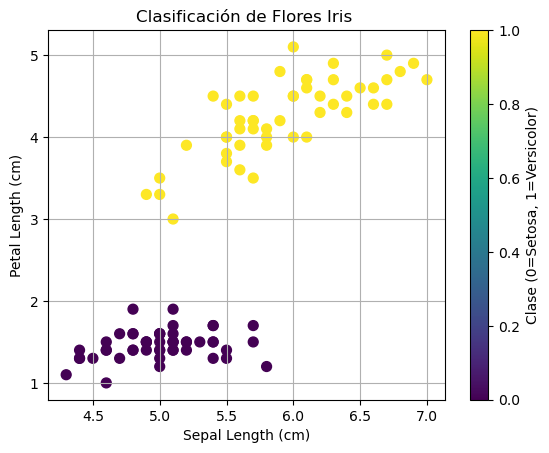

In [83]:
# Graficar los datos para observar si son linealmente separables
plt.scatter(inputs[:, 0], inputs[:, 1], c=labels, cmap='viridis', marker='o', s=50)
plt.title("Clasificación de Flores Iris ")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.grid(True)
plt.colorbar(label='Clase (0=Setosa, 1=Versicolor)')
plt.show()

In [43]:
# Clase Perceptrón
class Perceptron():
    def __init__(self, inputs, labels, learning_rate, weights, bias, epochs=20):
        self.inputs = inputs
        self.labels = labels
        self.learning_rate = learning_rate
        self.weights = weights
        self.bias = bias
        self.epochs = epochs

    def activation(self, z):
        return 1 if z > 0 else 0

    def predict(self, input_x, weights_fit, bias_fit):
        z = np.dot(input_x, weights_fit) + bias_fit
        y_pred = self.activation(z)
        return y_pred
    
    def fit(self):
        for epoch in range(self.epochs):
            print(f"Epoch {epoch + 1} / {self.epochs}", end=" ")
            total_error = 0
            
            for input, label in zip(self.inputs, self.labels):
                z = np.dot(input, self.weights) + self.bias
                y_pred = self.activation(z)
                error = label - y_pred
                total_error += abs(error)
                
                delta_w = self.learning_rate * error * input
                self.weights = self.weights + delta_w
                
                delta_bias = self.learning_rate * error
                self.bias = self.bias + delta_bias

            average_error = total_error / len(self.labels)
            print(f"Average Error: {average_error}")
            
            # Detener el entrenamiento si el error es 0
            if average_error == 0:
                print("\nEntrenamiento terminado temprano - error 0 alcanzado!")
                break
                
        return self.weights, self.bias

In [49]:
#Entrenamiento del perceptron
# Definición de hiperparámetros
learning_rate = 0.01
bias = np.random.rand()
epochs = 20
weights = np.random.rand(2)

# Crear el objeto perceptron
perceptron = Perceptron(inputs, labels, learning_rate, weights, bias, epochs)

# Entrenar el perceptron
w, b = perceptron.fit()
print(f"\nPesos finales: {w}, Bias final: {b}")

Epoch 1 / 20 Average Error: 0.11
Epoch 2 / 20 Average Error: 0.02
Epoch 3 / 20 Average Error: 0.03
Epoch 4 / 20 Average Error: 0.02
Epoch 5 / 20 Average Error: 0.03
Epoch 6 / 20 Average Error: 0.01
Epoch 7 / 20 Average Error: 0.0

Entrenamiento terminado temprano - error 0 alcanzado!

Pesos finales: [-0.08401368  0.08422983], Bias final: 0.23501284385162513


In [55]:
# Realizar 3 predicciones
test_samples = np.array([
    [5.0, 1.5],  # Setosa
    [6.0, 4.0],  # Versicolor
    [5.5, 3.0]   # Frontera
])

print("\nPredicciones:")
for sample in test_samples:
    prediction = perceptron.predict(sample, w, b)
    species = "Iris-setosa" if prediction == 0 else "Iris-versicolor"
    print(f"Muestra: {sample} -> Predicción: {prediction} ({species})")


Predicciones:
Muestra: [5.  1.5] -> Predicción: 0 (Iris-setosa)
Muestra: [6. 4.] -> Predicción: 1 (Iris-versicolor)
Muestra: [5.5 3. ] -> Predicción: 1 (Iris-versicolor)


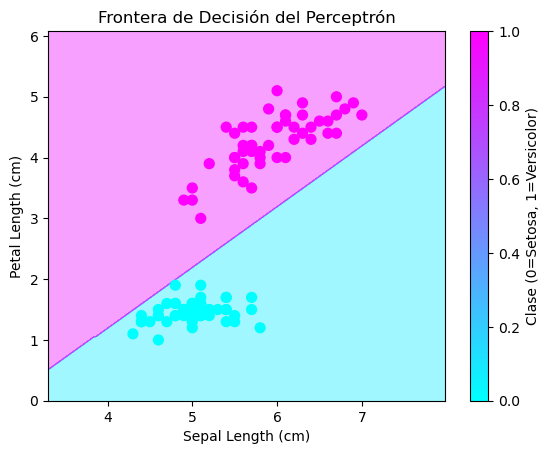

In [77]:
# Crear una malla para visualizar la frontera de decisión
x_min, x_max = inputs[:, 0].min() - 1, inputs[:, 0].max() + 1
y_min, y_max = inputs[:, 1].min() - 1, inputs[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predecir para cada punto de la malla
Z = np.array([perceptron.predict(np.array([x, y]), w, b) for x, y in zip(xx.ravel(), yy.ravel())])
Z = Z.reshape(xx.shape)

# Graficar
plt.contourf(xx, yy, Z, alpha=0.4, cmap='cool')
plt.scatter(inputs[:, 0], inputs[:, 1], c=labels, cmap='cool', s=50)
plt.title("Frontera de Decisión del Perceptrón")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.colorbar(label='Clase (0=Setosa, 1=Versicolor)')
plt.show()